# Marvel's character sentiment analysis



**Text mining project 2022**

*Group: 37*

In this notebook, we will take a look at the dialogue lines of Marvel characters and calculate their sentiment score. 

With help from a kaggle repository, 

https://www.kaggle.com/datasets/phiitm/marvel-cinematic-universe-dialogue-dataset?select=Avenger

and the VADER senitment analyser.

In [1]:
# import necessary modules

import pandas as pd
import numpy as np


In [2]:
# import our files

marvel_lines = pd.read_csv('/content/sample_data/mcu.csv')

## Investigate the data

In [3]:
# display the first 5 items from the file
marvel_lines.head()

marvel_lines['words'].describe()

count    15724.000000
mean        11.011956
std         14.273662
min          1.000000
25%          4.000000
50%          7.000000
75%         13.000000
max        269.000000
Name: words, dtype: float64

In [4]:
# Show all the columns in the dataframe
columns = marvel_lines.columns
columns

Index(['Unnamed: 0', 'character', 'line', 'movie', 'year', 'words',
       'Adam McKay', 'Anna Boden', 'Art Marcum', 'Ashley Edward Miller',
       'Chris McKenna', 'Christopher Ford', 'Christopher Markus',
       'Christopher Yost', 'Craig Kyle', 'Don Payne', 'Drew Pearce',
       'Edgar Wright', 'Eric Pearson', 'Erik Sommers',
       'Geneva Robertson-Dworet', 'Hawk Ostby', 'James Gunn', 'Joe Cornish',
       'Joe Robert Cole', 'John Francis Daley', 'Jon Watts',
       'Jonathan Goldstein', 'Joss Whedon', 'Justin Theroux', 'Mark Fergus',
       'Matt Holloway', 'Paul Rudd', 'Ryan Coogler', 'Ryan Fleck',
       'Shane Black', 'Stephen McFeely', 'Zack Stentz'],
      dtype='object')

In [5]:
# Investigate null values
marvel_lines.isna().sum()

Unnamed: 0                 0
character                  0
line                       0
movie                      0
year                       0
words                      0
Adam McKay                 0
Anna Boden                 0
Art Marcum                 0
Ashley Edward Miller       0
Chris McKenna              0
Christopher Ford           0
Christopher Markus         0
Christopher Yost           0
Craig Kyle                 0
Don Payne                  0
Drew Pearce                0
Edgar Wright               0
Eric Pearson               0
Erik Sommers               0
Geneva Robertson-Dworet    0
Hawk Ostby                 0
James Gunn                 0
Joe Cornish                0
Joe Robert Cole            0
John Francis Daley         0
Jon Watts                  0
Jonathan Goldstein         0
Joss Whedon                0
Justin Theroux             0
Mark Fergus                0
Matt Holloway              0
Paul Rudd                  0
Ryan Coogler               0
Ryan Fleck    

In [6]:
# Investigate data types for each column
marvel_lines.dtypes

Unnamed: 0                  int64
character                  object
line                       object
movie                      object
year                        int64
words                       int64
Adam McKay                   bool
Anna Boden                   bool
Art Marcum                   bool
Ashley Edward Miller         bool
Chris McKenna                bool
Christopher Ford             bool
Christopher Markus           bool
Christopher Yost             bool
Craig Kyle                   bool
Don Payne                    bool
Drew Pearce                  bool
Edgar Wright                 bool
Eric Pearson                 bool
Erik Sommers                 bool
Geneva Robertson-Dworet      bool
Hawk Ostby                   bool
James Gunn                   bool
Joe Cornish                  bool
Joe Robert Cole              bool
John Francis Daley           bool
Jon Watts                    bool
Jonathan Goldstein           bool
Joss Whedon                  bool
Justin Theroux

## Data preperation

In [7]:
# Dropping unnecessary columns

marvel_lines = marvel_lines.drop(['Unnamed: 0', 'year', 'words', 'Adam McKay', 'Anna Boden', 'Art Marcum', 'Ashley Edward Miller',
       'Chris McKenna', 'Christopher Ford', 'Christopher Markus',
       'Christopher Yost', 'Craig Kyle', 'Don Payne', 'Drew Pearce',
       'Edgar Wright', 'Eric Pearson', 'Erik Sommers',
       'Geneva Robertson-Dworet', 'Hawk Ostby', 'James Gunn', 'Joe Cornish',
       'Joe Robert Cole', 'John Francis Daley', 'Jon Watts',
       'Jonathan Goldstein', 'Joss Whedon', 'Justin Theroux', 'Mark Fergus',
       'Matt Holloway', 'Paul Rudd', 'Ryan Coogler', 'Ryan Fleck',
       'Shane Black', 'Stephen McFeely', 'Zack Stentz'], axis=1)
marvel_lines

,character,line,movie
0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man
1,IRON MAN JIMMY,No. We’re allowed to talk.,Iron Man
2,TONY STARK,Oh. I see. So it’s personal.,Iron Man
3,RAMIREZ,I think they’re intimidated.,Iron Man
4,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man
...,...,...,...
15719,STEVE ROGERS,It isn’t.,Avengers: Endgame
15720,SAM WILSON,Thank you. I’ll try my best.,Avengers: Endgame
15721,STEVE ROGERS,That’s why it’s yours.,Avengers: Endgame
15722,SAM WILSON,You gonna tell me about her?,Avengers: Endgame


In [8]:
# Checking for duplicates
duplicates = marvel_lines[marvel_lines.duplicated()]
print("Number of duplicates: ", marvel_lines.duplicated().sum())
duplicates

Number of duplicates:  251


,character,line,movie
964,PEPPER POTTS,Thank you very much.,Iron Man 2
1007,NATASHA ROMANOFF,Mr Stark?,Iron Man 2
1050,HAPPY HOGAN,Yeah.,Iron Man 2
1110,IVAN VANKO,"Very good, man.",Iron Man 2
1116,IVAN VANKO,I want my bird.,Iron Man 2
...,...,...,...
15316,THANOS,Gone. Reduced to atoms.,Avengers: Endgame
15317,BRUCE BANNER,You used them two days ago!,Avengers: Endgame
15325,JAMES RHODES,He’s lying.,Avengers: Endgame
15326,NEBULA,My father is many things. A liar is not one o...,Avengers: Endgame


In [9]:
# Dropping duplicates
marvel_lines.drop_duplicates(inplace = True)
print("Number of duplicates: ", marvel_lines.duplicated().sum())
marvel_lines

Number of duplicates:  0


,character,line,movie
0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man
1,IRON MAN JIMMY,No. We’re allowed to talk.,Iron Man
2,TONY STARK,Oh. I see. So it’s personal.,Iron Man
3,RAMIREZ,I think they’re intimidated.,Iron Man
4,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man
...,...,...,...
15719,STEVE ROGERS,It isn’t.,Avengers: Endgame
15720,SAM WILSON,Thank you. I’ll try my best.,Avengers: Endgame
15721,STEVE ROGERS,That’s why it’s yours.,Avengers: Endgame
15722,SAM WILSON,You gonna tell me about her?,Avengers: Endgame


In [10]:
# Retrieve top 5 characters with most lines
most_lines = marvel_lines['character'].value_counts(sort=True, ascending=False)

most_lines[:5]

TONY STARK          1765
STEVE ROGERS         969
THOR                 834
PETER PARKER         521
NATASHA ROMANOFF     496
Name: character, dtype: int64

Total number of lines:  4585


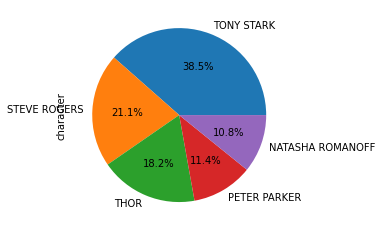

In [11]:
# Visualise the distribution
import matplotlib.pyplot as plt
top5 = most_lines[:5]
print("Total number of lines: ", top5.sum())

top5.plot.pie(autopct='%1.1f%%')

In [12]:
# Retrieve the lines from the top 5 characters
df_top5 = marvel_lines.loc[(marvel_lines['character'] == 'TONY STARK') | (marvel_lines['character'] == 'STEVE ROGERS')
                            | (marvel_lines['character'] == 'THOR') | (marvel_lines['character'] == 'PETER PARKER')
                            | (marvel_lines['character'] == 'NATASHA ROMANOFF')]


In [13]:
# Represent in a pivot table
lines_per_movie = df_top5.pivot_table(values= 'line', index= 'character', columns= 'movie', aggfunc= 'count')
lines_per_movie

movie,Ant-Man,Avengers: Age of Ultron,Avengers: Endgame,Avengers: Infinity War,Captain America: Civil War,Captain America: The First Avenger,Captain America: The Winter Soldier,Captain Marvel,Iron Man,Iron Man 2,Iron Man 3,Spider-Man: Homecoming,The Avengers,Thor,Thor: Ragnarok,Thor: The Dark World
character,,,,,,,,,,,,,,,,
NATASHA ROMANOFF,1.0,79.0,69.0,15.0,64.0,NaN,112.0,3.0,NaN,55.0,NaN,NaN,97.0,NaN,1.0,NaN
PETER PARKER,NaN,NaN,7.0,39.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,402.0,NaN,NaN,NaN,NaN
STEVE ROGERS,3.0,133.0,119.0,25.0,154.0,186.0,218.0,3.0,NaN,NaN,NaN,7.0,121.0,NaN,NaN,NaN
THOR,NaN,55.0,70.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,166.0,289.0,133.0
TONY STARK,NaN,173.0,137.0,119.0,165.0,NaN,NaN,NaN,252.0,335.0,358.0,74.0,152.0,NaN,NaN,NaN


In [14]:
# Check for null values
lines_per_movie.isnull().sum() 

movie
Ant-Man                                3
Avengers: Age of Ultron                1
Avengers: Endgame                      0
Avengers: Infinity War                 0
Captain America: Civil War             1
Captain America: The First Avenger     4
Captain America: The Winter Soldier    3
Captain Marvel                         3
Iron Man                               4
Iron Man 2                             3
Iron Man 3                             4
Spider-Man: Homecoming                 2
The Avengers                           1
Thor                                   4
Thor: Ragnarok                         3
Thor: The Dark World                   4
dtype: int64

In [15]:
# Replace NaN values with '0'
lines_per_movie = lines_per_movie.fillna("0")
lines_per_movie

movie,Ant-Man,Avengers: Age of Ultron,Avengers: Endgame,Avengers: Infinity War,Captain America: Civil War,Captain America: The First Avenger,Captain America: The Winter Soldier,Captain Marvel,Iron Man,Iron Man 2,Iron Man 3,Spider-Man: Homecoming,The Avengers,Thor,Thor: Ragnarok,Thor: The Dark World
character,,,,,,,,,,,,,,,,
NATASHA ROMANOFF,1.0,79.0,69.0,15.0,64.0,0,112.0,3.0,0,55.0,0,0,97.0,0,1.0,0
PETER PARKER,0,0,7.0,39.0,73.0,0,0,0,0,0,0,402.0,0,0,0,0
STEVE ROGERS,3.0,133.0,119.0,25.0,154.0,186.0,218.0,3.0,0,0,0,7.0,121.0,0,0,0
THOR,0,55.0,70.0,74.0,0,0,0,0,0,0,0,0,47.0,166.0,289.0,133.0
TONY STARK,0,173.0,137.0,119.0,165.0,0,0,0,252.0,335.0,358.0,74.0,152.0,0,0,0


## VADER

In [16]:
# Import tokenize module
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
# Import VADER
from nltk.sentiment import vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [18]:
# Sentiment function
def calculate_sentiment(lines):
  analyser_model = SentimentIntensityAnalyzer()
  
  sentiment_per_line = []
  
  # tokenize the script line
  tokenized_lines = sent_tokenize(lines)
  for line in tokenized_lines:
    scores = analyser_model.polarity_scores(line)
    sentiment_per_line.append(scores['compound'])
      
  avg_sentiments = np.mean(sentiment_per_line)

  # give each sentiment score a label
  if avg_sentiments >= 0.05:
    return 1 # positive
  elif avg_sentiments <= -0.05:
    return -1 # negative
  else:
    return 0 # neutral


In [19]:
df_top5

,character,line,movie
0,TONY STARK,"Oh, I get it. You guys aren’t allowed to talk...",Iron Man
2,TONY STARK,Oh. I see. So it’s personal.,Iron Man
4,TONY STARK,"Good God, you’re a woman. I, honestly, I could...",Iron Man
6,TONY STARK,Please.,Iron Man
8,TONY STARK,Excellent question. Yes and no. March and I ha...,Iron Man
...,...,...,...
15715,STEVE ROGERS,That’s kind of why I’m here.,Avengers: Endgame
15717,STEVE ROGERS,I had a little time to travel. Try it on. How ...,Avengers: Endgame
15719,STEVE ROGERS,It isn’t.,Avengers: Endgame
15721,STEVE ROGERS,That’s why it’s yours.,Avengers: Endgame


In [20]:
# Make a copy of the dataframe, since we will replace values
from sklearn.metrics import classification_report

marvel_sentiment_df = df_top5.copy()

for line in df_top5['line']:
  sentiment = calculate_sentiment(line)
  marvel_sentiment_df['line'] = marvel_sentiment_df['line'].replace([line], sentiment)

Final results:

In [21]:
# Rename the column 'line' with 'sentiment score'
marvel_sentiment_df = marvel_sentiment_df.rename(columns={'line' : 'sentiment'})
marvel_sentiment_df

,character,sentiment,movie
0,TONY STARK,0,Iron Man
2,TONY STARK,0,Iron Man
4,TONY STARK,1,Iron Man
6,TONY STARK,1,Iron Man
8,TONY STARK,1,Iron Man
...,...,...,...
15715,STEVE ROGERS,0,Avengers: Endgame
15717,STEVE ROGERS,0,Avengers: Endgame
15719,STEVE ROGERS,0,Avengers: Endgame
15721,STEVE ROGERS,0,Avengers: Endgame


## Results and visualisation

sentiment,-1,0,1
character,,,
NATASHA ROMANOFF,96,244,156
PETER PARKER,97,243,181
STEVE ROGERS,168,572,229
THOR,229,359,246
TONY STARK,287,869,609


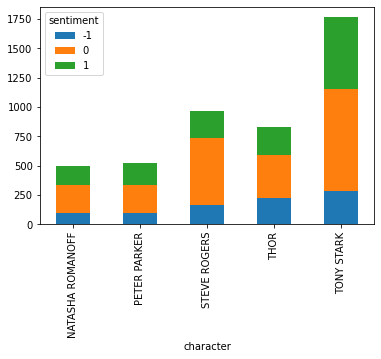

In [22]:
#  Present sentiment score occurences for each character
sentiment_occurence = marvel_sentiment_df.pivot_table(values= 'movie', index= 'character', columns= 'sentiment', aggfunc= 'count')
display(sentiment_occurence)

stacked_bar = sentiment_occurence.plot.bar(stacked=True)

sentiment
-1     877
 0    2287
 1    1421
Name: movie, dtype: int64


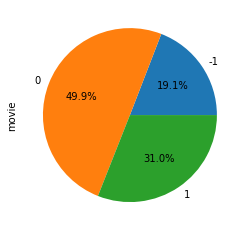

In [23]:
# Present a sentiment distribution
sentiment_distribution = marvel_sentiment_df['movie'].groupby(marvel_sentiment_df['sentiment']).count()

print(sentiment_distribution)
sentiment_distribution.plot.pie(autopct='%1.1f%%')

In [24]:
# Give an example sentence with sentiment scores
# Same function as calculate_sentiment
# Only this one prints out some information
def sentiment_label(lines):
  analyser_model = SentimentIntensityAnalyzer()
  
  sentiment_per_line = []
  
  # tokenize the script line
  tokenized_lines = sent_tokenize(lines)
  for line in tokenized_lines:
    scores = analyser_model.polarity_scores(line)
    sentiment_per_line.append(scores['compound'])
    print('Script line:', line) # printing out the script line
    print('VADER output:', scores) # printing out the sentiment score for the line

  print('Compound score:', sentiment_per_line) # print out the compound scores
  avg_sentiments = np.mean(sentiment_per_line)  
  print('Average compound:', avg_sentiments) # print out  the average 
  
  # give each sentiment score a label
  if avg_sentiments >= 0.05:
    return 1 # positive
  elif avg_sentiments <= -0.05:
    return -1 # negative
  else:
    return 0 # neutral

In [59]:
for line in df_top5['line'][4:5]:
  sentiment_label(line)

Script line: Excellent question.
VADER output: {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
Script line: Yes and no.
VADER output: {'neg': 0.373, 'neu': 0.169, 'pos': 0.458, 'compound': 0.128}
Script line: March and I had a schedule conflict but, thankfully, the Christmas cover was twins.
VADER output: {'neg': 0.107, 'neu': 0.651, 'pos': 0.241, 'compound': 0.4678}
Script line: Anyone else?
VADER output: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Script line: You, with the hand up.
VADER output: {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.4939}
Compound score: [0.5719, 0.128, 0.4678, 0.0, 0.4939]
Average compound: 0.33232


In [26]:
# Filter out the neutral results
# To inspect the 'extreme' cases (positive and negative)
positive_negative = marvel_sentiment_df[marvel_sentiment_df.sentiment != 0]
positive_negative

,character,sentiment,movie
4,TONY STARK,1,Iron Man
6,TONY STARK,1,Iron Man
8,TONY STARK,1,Iron Man
10,TONY STARK,1,Iron Man
12,TONY STARK,-1,Iron Man
...,...,...,...
15676,THOR,-1,Avengers: Endgame
15684,THOR,-1,Avengers: Endgame
15694,STEVE ROGERS,1,Avengers: Endgame
15711,STEVE ROGERS,1,Avengers: Endgame


sentiment,-1,1
character,,
NATASHA ROMANOFF,96,156
PETER PARKER,97,181
STEVE ROGERS,168,229
THOR,229,246
TONY STARK,287,609


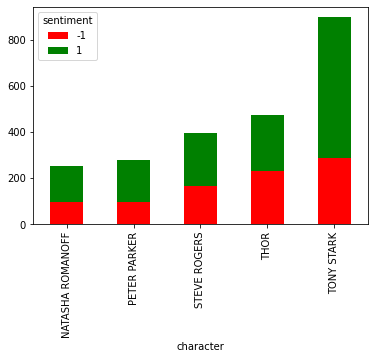

In [27]:
# Displaying the results into another stacked bar
pos_neg_occurence = positive_negative.pivot_table(values= 'movie', index= 'character', columns= 'sentiment', aggfunc= 'count')
display(pos_neg_occurence)

stacked_bar_pos_neg = pos_neg_occurence.plot.bar(stacked=True, color=['red', 'green'])

In [48]:
tony_stark = positive_negative.loc[(positive_negative['character'] == 'TONY STARK')]

tony_stark

,character,sentiment,movie
4,TONY STARK,1,Iron Man
6,TONY STARK,1,Iron Man
8,TONY STARK,1,Iron Man
10,TONY STARK,1,Iron Man
12,TONY STARK,-1,Iron Man
...,...,...,...
15601,TONY STARK,-1,Avengers: Endgame
15609,TONY STARK,1,Avengers: Endgame
15611,TONY STARK,1,Avengers: Endgame
15631,TONY STARK,-1,Avengers: Endgame


sentiment,-1,1
movie,,
Avengers: Age of Ultron,27,58
Avengers: Endgame,23,46
Avengers: Infinity War,22,45
Captain America: Civil War,33,50
Iron Man,40,76
Iron Man 2,45,138
Iron Man 3,62,113
Spider-Man: Homecoming,10,36
The Avengers,25,47


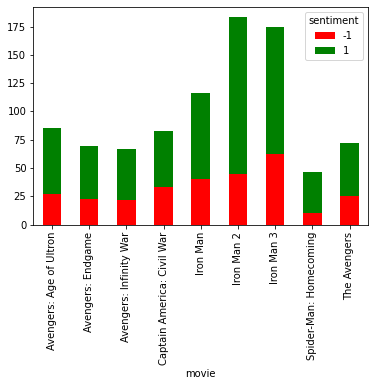

In [49]:
development_TS = tony_stark.pivot_table(values= 'character', index= 'movie', columns= 'sentiment', aggfunc= 'count')

display(development_TS)

stacked_bar_TS = development_TS.plot.bar(stacked=True, color=['red', 'green'])
stacked_bar_TS

In [50]:
thor = positive_negative.loc[(positive_negative['character'] == 'THOR')]

thor

,character,sentiment,movie
1726,THOR,-1,Thor
1728,THOR,-1,Thor
1730,THOR,-1,Thor
1732,THOR,-1,Thor
1734,THOR,-1,Thor
...,...,...,...
15664,THOR,1,Avengers: Endgame
15670,THOR,-1,Avengers: Endgame
15672,THOR,1,Avengers: Endgame
15676,THOR,-1,Avengers: Endgame


sentiment,-1,1
movie,,
Avengers: Age of Ultron,11,26
Avengers: Endgame,16,18
Avengers: Infinity War,26,18
The Avengers,16,12
Thor,47,37
Thor: Ragnarok,79,89
Thor: The Dark World,34,46


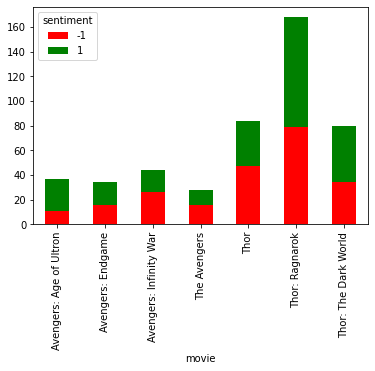

In [51]:
development_T = thor.pivot_table(values= 'character', index= 'movie', columns= 'sentiment', aggfunc= 'count')

display(development_T)

stacked_bar_T = development_T.plot.bar(stacked=True, color=['red', 'green'])
stacked_bar_T


In [52]:
steve_rogers = positive_negative.loc[(positive_negative['character'] == 'STEVE ROGERS')]

steve_rogers

,character,sentiment,movie
2553,STEVE ROGERS,-1,Captain America: The First Avenger
2558,STEVE ROGERS,1,Captain America: The First Avenger
2560,STEVE ROGERS,-1,Captain America: The First Avenger
2562,STEVE ROGERS,1,Captain America: The First Avenger
2568,STEVE ROGERS,1,Captain America: The First Avenger
...,...,...,...
15544,STEVE ROGERS,-1,Avengers: Endgame
15603,STEVE ROGERS,-1,Avengers: Endgame
15694,STEVE ROGERS,1,Avengers: Endgame
15711,STEVE ROGERS,1,Avengers: Endgame


sentiment,-1,1
movie,,
Avengers: Age of Ultron,22,36
Avengers: Endgame,16,23
Avengers: Infinity War,4,4
Captain America: Civil War,25,39
Captain America: The First Avenger,34,46
Captain America: The Winter Soldier,41,54
Spider-Man: Homecoming,1,2
The Avengers,25,25


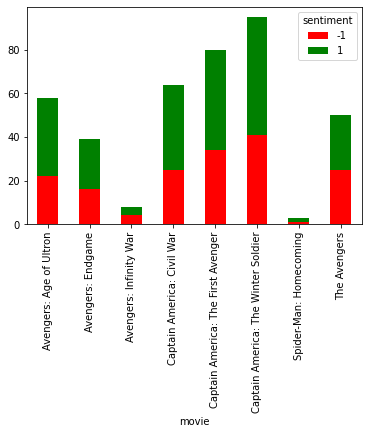

In [53]:
development_SR = steve_rogers.pivot_table(values= 'character', index= 'movie', columns= 'sentiment', aggfunc= 'count')

display(development_SR)

stacked_bar_SR = development_SR.plot.bar(stacked=True, color=['red', 'green'])
stacked_bar_SR

In [54]:
peter_parker = positive_negative.loc[(positive_negative['character'] == 'PETER PARKER')]

peter_parker

,character,sentiment,movie
8904,PETER PARKER,1,Captain America: Civil War
8908,PETER PARKER,1,Captain America: Civil War
8912,PETER PARKER,1,Captain America: Civil War
8915,PETER PARKER,1,Captain America: Civil War
8917,PETER PARKER,1,Captain America: Civil War
...,...,...,...
13920,PETER PARKER,1,Avengers: Infinity War
15594,PETER PARKER,1,Avengers: Endgame
15620,PETER PARKER,-1,Avengers: Endgame
15628,PETER PARKER,1,Avengers: Endgame


sentiment,-1,1
movie,,
Avengers: Endgame,1,3
Avengers: Infinity War,9,12
Captain America: Civil War,12,29
Spider-Man: Homecoming,75,137


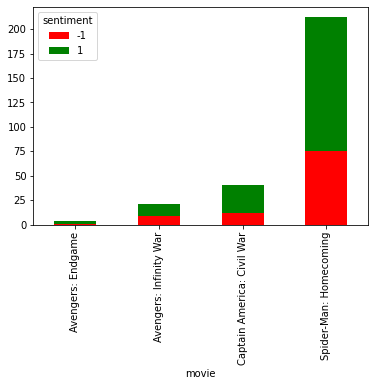

In [55]:
development_PP = peter_parker.pivot_table(values= 'character', index= 'movie', columns= 'sentiment', aggfunc= 'count')

display(development_PP)

stacked_bar_PP = development_PP.plot.bar(stacked=True, color=['red', 'green'])

In [56]:
natasha_romanoff = positive_negative.loc[(positive_negative['character'] == 'NATASHA ROMANOFF')]

natasha_romanoff

,character,sentiment,movie
883,NATASHA ROMANOFF,-1,Iron Man 2
896,NATASHA ROMANOFF,1,Iron Man 2
917,NATASHA ROMANOFF,1,Iron Man 2
934,NATASHA ROMANOFF,1,Iron Man 2
943,NATASHA ROMANOFF,1,Iron Man 2
...,...,...,...
15439,NATASHA ROMANOFF,1,Avengers: Endgame
15448,NATASHA ROMANOFF,1,Avengers: Endgame
15457,NATASHA ROMANOFF,-1,Avengers: Endgame
15459,NATASHA ROMANOFF,1,Avengers: Endgame


sentiment,-1,1
movie,,
Avengers: Age of Ultron,19.0,23.0
Avengers: Endgame,8.0,16.0
Avengers: Infinity War,6.0,4.0
Captain America: Civil War,12.0,24.0
Captain America: The Winter Soldier,26.0,37.0
Captain Marvel,NaN,1.0
Iron Man 2,5.0,19.0
The Avengers,20.0,31.0
Thor: Ragnarok,NaN,1.0


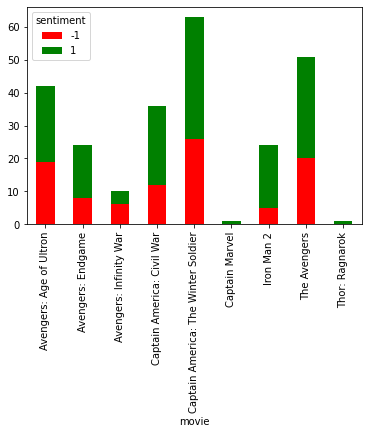

In [57]:
development_NR = natasha_romanoff.pivot_table(values= 'character', index= 'movie', columns= 'sentiment', aggfunc= 'count')

display(development_NR)

stacked_bar_NR = development_NR.plot.bar(stacked=True, color=['red', 'green'])
stacked_bar_NR